# Modelling and fitting a spectrum with two resolved lines

Based on what we have seen in the example [Modelling and fitting one emission line](./script_example_model+fit_1_line.ipynb) we will model and fit a spectrum with two resolved lines. This example will then be used in [Modelling and fitting two unresolved emission lines with a Bayesian approach](./script_example_model+fit_2_lines_bayes.ipynb)

In [1]:
# inline plotting for jupyter notebook. Do not put this line in a real python script.
%matplotlib inline

In [2]:
import orb.fit
import pylab as pl
import numpy as np
from orb.core import Lines

## Second step: modelling and fitting a spectrum with two resolved lines

No particular difficulty here. A classical algorithm is good enough.

(15200, 15270)

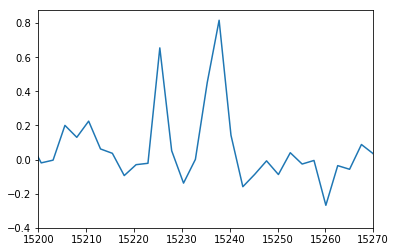

In [3]:
halpha_cm1 = Lines().get_line_cm1('Halpha')

step = 2943
order = 8
resolution = 5000
theta = 15.5
axis_corr = 1. / np.cos(np.deg2rad(theta))

# model spectrum
velocity1 = 250
broadening1 = 15
spectrum1 = orb.fit.create_cm1_lines_model([halpha_cm1], [1], step, order, resolution, theta, fmodel='sincgauss',
                                         sigma=broadening1, vel=velocity1)

velocity2 = 10
broadening2 = 30
spectrum2 = orb.fit.create_cm1_lines_model([halpha_cm1], [1], step, order, resolution, theta, fmodel='sincgauss',
                                         sigma=broadening2, vel=velocity2)

spectrum = spectrum1 + spectrum2

# add noise
spectrum += np.random.standard_normal(spectrum.shape) * 0.1

spectrum_axis = orb.utils.spectrum.create_cm1_axis(np.size(spectrum), step, order, corr=axis_corr)

pl.plot(spectrum_axis, spectrum)
pl.xlim((15200, 15270))


velocity (in km/s):  [252.2(3.4) 13.4(4.5)]
broadening (in km/s):  [19.6(5.2) 31.5(4.8)]
flux (in the unit of the spectrum amplitude / unit of the axis fwhm):  [1.32(20) 1.66(27)]


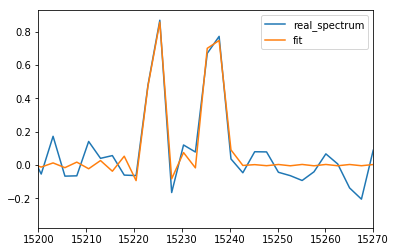

In [9]:
nm_laser = 543.5 # wavelength of the calibration laser, in fact it can be any real positive number (e.g. 1 is ok)

# pos_def must be given here because, by default all the lines are considered 
#   to share the same velocity. i.e. sigma_def = ['1', '1']. As the two lines do not have 
#   the same velocity we put them in two different velocity groups: sigma_def = ['1', '2']
#
# pos_cov is the velocity of the lines in km/s. It is a covarying parameter,
#   because the reference position -i.e. the initial guess- of the lines is set
# 
# sigma_guess is the initial guess on the broadening (in km/s)

fit = orb.fit.fit_lines_in_spectrum(spectrum, [halpha_cm1, halpha_cm1], step, order, nm_laser, theta, 0, 
                                    wavenumber=True, apodization=1, fmodel='sincgauss',
                                    pos_def=['1', '2'],
                                    pos_cov=[velocity1, velocity2], 
                                    sigma_guess=[broadening1, broadening2])
print 'velocity (in km/s): ', fit['velocity_gvar']
print 'broadening (in km/s): ', fit['broadening_gvar']
print 'flux (in the unit of the spectrum amplitude / unit of the axis fwhm): ', fit['flux_gvar']
pl.plot(spectrum_axis, spectrum, label='real_spectrum')
pl.plot(spectrum_axis, fit['fitted_vector'], label='fit')
pl.xlim((15200, 15270))
pl.legend()